In [1]:
# Data manipulation
import pandas as pd
import numpy as np
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns

import pydash as _
import datetime
import time
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from google.cloud import bigquery
import json

In [2]:
def find_latency(row):
    return row['req_end'] - row['req_start']

In [25]:
result_write = ['placeholder']
for i in range(1, 9):
    thread_cnt = 2**i
    result_write.append(pd.read_csv(f'learnjava/bigtable_test_results/write_tests/result_write_{thread_cnt}.csv'))
    result_write[i]['latency'] = result_write[i].apply(lambda row: find_latency(row), axis=1)
    print(f'\nFor {thread_cnt} threads:')
    print(f'Avg rps: {len(result_write[i])/300}')
    print(f'Avg latency: {result_write[i]["latency"].mean()}')


For 2 threads:
Avg rps: 592.88
Avg latency: 3.364930508703279

For 4 threads:
Avg rps: 1200.4666666666667
Avg latency: 3.3262869995001942

For 8 threads:
Avg rps: 2187.1266666666666
Avg latency: 3.6518445814752383

For 16 threads:
Avg rps: 2826.56
Avg latency: 5.652493962036303

For 32 threads:
Avg rps: 3783.0733333333333
Avg latency: 8.446778721357063

For 64 threads:
Avg rps: 4245.956666666667
Avg latency: 15.067179206570643

For 128 threads:
Avg rps: 5023.5633333333335
Avg latency: 25.477899817460248

For 256 threads:
Avg rps: 5026.606666666667
Avg latency: 50.929048224713554


In [27]:
write_x = []
write_y = []
for i in range(1, len(result_write)):
    write_x.append(len(result_write[i])/300)
    write_y.append(result_write[i]["latency"].mean())

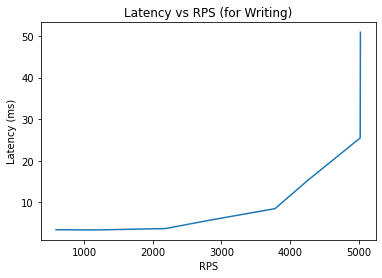

In [29]:
plt.plot(write_x, write_y)
plt.xlabel('RPS')
plt.ylabel('Latency (ms)')
plt.title('Latency vs RPS (for Writing)')
plt.show()

In [26]:
result_read = ['placeholder']
for i in range(1, 8):
    thread_cnt = 2**i
    result_read.append(pd.read_csv(f'learnjava/bigtable_test_results/read_tests/result_read_{thread_cnt}.csv'))
    result_read[i]['latency'] = result_read[i].apply(lambda row: find_latency(row), axis=1)
    print(f'\nFor {thread_cnt} threads:')
    print(f'Avg rps: {len(result_read[i])/300}')
    print(f'Avg latency: {result_read[i]["latency"].mean()}')


For 2 threads:
Avg rps: 724.5866666666667
Avg latency: 2.7510718754600325

For 4 threads:
Avg rps: 1464.7533333333333
Avg latency: 2.724383627732542

For 8 threads:
Avg rps: 2228.97
Avg latency: 3.5829568515203585

For 16 threads:
Avg rps: 2852.3733333333334
Avg latency: 5.59922964735799

For 32 threads:
Avg rps: 3470.5866666666666
Avg latency: 9.213446141670573

For 64 threads:
Avg rps: 3871.1666666666665
Avg latency: 16.52277607956258

For 128 threads:
Avg rps: 4070.43
Avg latency: 31.438512229256695


In [30]:
read_x = []
read_y = []
for i in range(1, len(result_read)):
    read_x.append(len(result_read[i])/300)
    read_y.append(result_read[i]["latency"].mean())

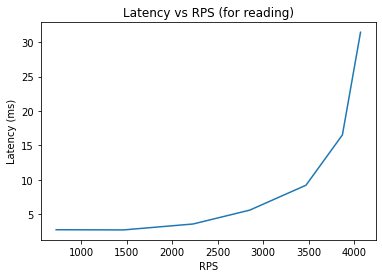

In [31]:
plt.plot(read_x, read_y)
plt.xlabel('RPS')
plt.ylabel('Latency (ms)')
plt.title('Latency vs RPS (for reading)')
plt.show()